In [99]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import mean_squared_error
import seaborn as sns

%matplotlib inline

In [100]:
# Task 1
# Find the roots of square equation by gradient descent
# x ** 2 - 6 * x + 4 = 0


In [101]:
# возвести в квадрат
# посчитать производную
# надо начать движение от начальной точки в направлении антградиента с заданным шагом
# x = x - lr * grad(x)
# всегда ли сойдемся за приемлемое количество шагов?
# важна ли начальная точка?
# как найти второй корень?
# как вляет ЛР?

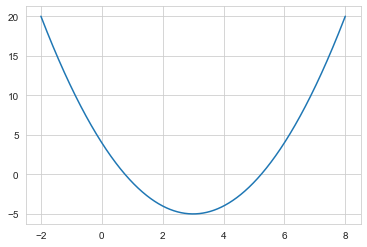

In [102]:
x = np.linspace(-2,8,1000)
y = x**2-6*x+4
plt.plot(x, x**2-6*x+4);

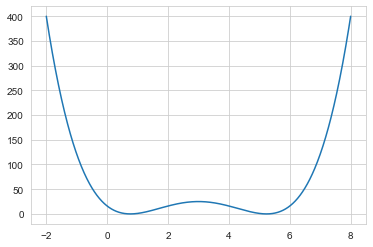

In [103]:
plt.plot(x, x**4 - 12*x**3 + 44*x**2 - 48*x + 16);

In [104]:
def find_min_grad(x_begin, lr):
    if x_begin == 0:
        x_begin = 0.1
    elif x_begin == 3:
        x_begin = 3.1
    x = 0
    precision = 0.00001
    attemp = 0

    x_move = []
    y_move = []

    while (abs(x_begin - x) > precision) and attemp <= 10000:
        attemp += 1
        x = x_begin
        grad = 4*x**3 - 36*x**2 + 88*x - 48
        x_begin = x - grad * lr
        x_move.append(x_begin)
        try:
            y_move.append(4*x_begin**3 - 36*x_begin**2 + 88*x_begin - 48)
        except OverflowError:
            print('Необходимо сделать меньше шаг или выбрать другую точку старта')
            return False

    if attemp == 10001:
        print('Исчерпано количество попыток')
        return False
    else:
        print(f'Найдено значение минимума {round(x_begin,2)}.',
              f'Попыток истрачено {attemp}')
        if x_begin > 3:
            print('Чтобы найти второй корень попробуйте указать значение меньше 3')
        else:
            print('Чтобы найти второй корень попробуйте указать значение больше 3')
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))
        x = np.linspace(-20, 30, 1000)
        ax[0].scatter(x=x_move, y=y_move)
        ax[0].plot(x, 4*x**3 - 36*x**2 + 88*x - 48)
        x = np.linspace(-2,8,1000)
        ax[1].plot(x, x**4 - 12*x**3 + 44*x**2 - 48*x + 16)
        ax[1].scatter(x=x_begin, y = x_begin**4 - 12*x_begin**3 + 44*x_begin**2 - 48 * x_begin + 16)
        ax[1].plot(x, x**2-6*x+4)
        ax[1].set_ylim(-5, 30)
        plt.show()
        return x_begin

Найдено значение минимума 5.24. Попыток истрачено 1519
Чтобы найти второй корень попробуйте указать значение меньше 3


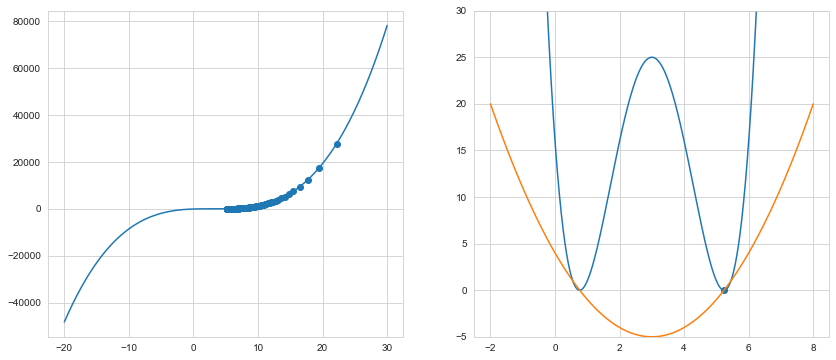

5.23855173802904

In [105]:
find_min_grad(30, 0.0001)

Найдено значение минимума 0.76. Попыток истрачено 200
Чтобы найти второй корень попробуйте указать значение больше 3


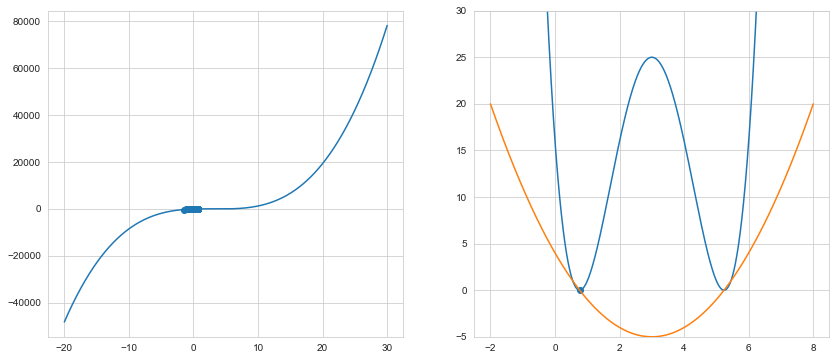

0.7636941628089201

In [106]:
find_min_grad(-10, 0.001)

Краткие выводы:
# всегда ли сойдемся за приемлемое количество шагов?
Если выбрать слишком маленький ЛР, то количество шагов будет слишком большим
# важна ли начальная точка?
Важна, от этого зависит:
1) Какой корень найдется
2) Если точка будет слишком далеко, то необходимо делать маленький ЛР, но тогда будет слишком большое количество попыток
# как найти второй корень?
Попробовать разные точки старта
# как влияет ЛР?
Если поставить слишком маленький ЛР, то количество попыток сильно увеличится, если поставить слишком большой, то можно перескочить минимум и уйти в бесконечный цикл.
Также, в данной задаче чем больше значение точки старта отличается от 0, тем больше необходимо ставить ЛР, иначе получаются слишком большие значения шагов

In [107]:
# Task 2
# Realize forward and backward pass for linear layer with sigmoid activation

In [108]:
def sigmoid(x):
    return 1. / (1 + torch.exp(-x))

def sigmoid_backward(da, x):
    sig = sigmoid(x)
    
    return da * sig * (1 - sig)

def relu(x):
    return torch.max(torch.tensor(0.), x)

def relu_backward(da, x):
    da = torch.as_tensor(np.array(da, copy = True))
    da[x <= 0] = 0;
    return da;

In [109]:
def mse_loss(t, y):
    return (t - y) ** 2

def d_mse_loss(t, y):
    return 2 * (y - t) 


In [110]:
class LinearLayer:
    def __init__(self, n_inp, n_out, activation='sigmoid'):
        self.w = torch.rand(n_out, n_inp) * 0.1
        self.b = torch.rand(n_out, 1) * 0.1
        if activation == 'sigmoid':
            self.activ = sigmoid
        if activation == 'relu':
            self.activ = relu
        elif activation == 'None':
            self.activ = None
        else:
            raise Exception(f'Unknown activation "{activation}"')
        self._clear_state()

    def _clear_state(self):
        self.lin = None
        self.inp = None
        self.d_w = None
        self.d_b = None

    def forward(self, x):
        self.inp = x
        if type(self.w) != type(self.inp):
            self.inp = torch.tensor(self.inp).float()
        self.lin = self.w @ self.inp + self.b
        activ = self.activ(self.lin) if self.activ is not None else self.lin

        return activ

    def backward(self, grad): # grad = d L / d z    Dout 
        # grad * dz / d lin
        if self.activ == sigmoid:
            grad_lin = sigmoid_backward(grad, self.lin) 
        elif self.activ == relu:
            grad_lin = relu_backward(grad, self.lin)
        else:
            grad_lin = grad
        # grad_lin * d lin / d w 
        m = self.inp.shape[1]
        self.d_w = grad_lin @ self.inp.T / m    # d_in dOut
        # grad_lin * d lin / d b 
        self.d_b = torch.sum(grad_lin, axis=1, keepdims=True) / m

        grad = self.w.T @ grad_lin

        return grad

# pred = model(x)
# loss = criterion(pred, target)
# grad = d loss / d pred
# model.backward(grad)

In [111]:
from typing import Tuple

class Model:
    def __init__(self, arch: Tuple[Tuple[int, int]], activation):
        self.layers = []
        for i, p in enumerate(arch):
            self.layers.append(
                LinearLayer(p[0], p[1], 
                            activation=activation if i < len(arch)-1 else 'None')
                )
        self._clear_state()
    
    def _clear_state(self):
        for l in self.layers:
            l._clear_state()

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        
        return x

    def backward(self, grad):
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

        return grad 

In [112]:
# Task 3
# Realize SGD Momentum optimizer
# velocity = momentum * velocity - lr * gradient
# w = w + velocity

In [113]:
#для всей модели
class SGDMomentum:
    def __init__(self, model: Model, lr= 0.0001, momentum=0.0):
        self.model = model
        self.lr = lr
        self.m = momentum
        self.vel = [[torch.zeros_like(layer.w),
                     torch.zeros_like(layer.b)] for layer in model.layers]

    def step(self):
        for i, layer in enumerate(self.model.layers):
            self.vel[i][0] = self.vel[i][0] * self.m - self.lr * layer.d_w 
            self.vel[i][1] = self.vel[i][1] * self.m - self.lr * layer.d_b 
            layer.w += self.vel[i][0]
            layer.b += self.vel[i][1]
    
    def zero_grad(self):
        self.model._clear_state()

In [114]:
#для всей модели
class Adagard:
    def __init__(self, model: Model, lr= 0.01):
        self.model = model
        self.lr = lr
        self.accumulated = [[torch.zeros_like(layer.w),
                     torch.zeros_like(layer.b)] for layer in self.model.layers]

    def step(self):
        for i, layer in enumerate(self.model.layers):
            self.accumulated[i][0] += layer.d_w**2
            self.accumulated[i][1] += layer.d_b**2

            adapt_lr_d_w = self.lr / torch.sqrt(self.accumulated[i][0])
            adapt_lr_d_b = self.lr / torch.sqrt(self.accumulated[i][1])

            layer.w -= adapt_lr_d_w * layer.d_w
            layer.b -= adapt_lr_d_b * layer.d_b

    def zero_grad(self):
        self.model._clear_state()

In [115]:
class Adam:
    def __init__(self, model: Model, lr= 0.001, beta1=0.9, beta2=0.9):
        self.model = model
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.vel = [[torch.zeros_like(layer.w),
                     torch.zeros_like(layer.b)] for layer in model.layers]
        self.accumulated = [[torch.zeros_like(layer.w),
                     torch.zeros_like(layer.b)] for layer in self.model.layers]

    def step(self):
        for i, layer in enumerate(self.model.layers):

            self.vel[i][0] = self.vel[i][0] * self.beta1 + (1 - self.beta1) * layer.d_w
            self.vel[i][1] = self.vel[i][1] * self.beta1 + (1 - self.beta1) * layer.d_b

            self.accumulated[i][0] = self.beta2 * self.accumulated[i][0]\
                                     + (1 - self.beta2) * layer.d_w**2

            self.accumulated[i][1] = self.beta2 * self.accumulated[i][1]\
                                     + (1 - self.beta2) * layer.d_b**2

            adapt_lr_d_w = self.lr / torch.sqrt(self.accumulated[i][0])
            adapt_lr_d_b = self.lr / torch.sqrt(self.accumulated[i][1])

            layer.w -= adapt_lr_d_w * self.vel[i][0]
            layer.b -= adapt_lr_d_b * self.vel[i][1]

    def zero_grad(self):
        self.model._clear_state()

In [116]:
# pred = model(x)
# loss = criterion(pred, target)
# grad = d loss / d pred
# model.backward(grad)
# optim.step()

In [117]:
x = torch.as_tensor(np.random.uniform(-2, 2, 20000))
y = x**2 + torch.randn(1)*0.1

In [118]:
model = Model(((1, 100), (100, 1)), activation='relu')
model2 = Model(((1, 100), (100, 1)), activation='relu')
model3 = Model(((1, 100), (100, 1)), activation='relu')
optim = SGDMomentum(model)
optim2 = Adagard(model2)
optim3 = Adam(model3)

for e in range(10):
    for i, (val, t) in enumerate(zip(x, y)):
        optim.zero_grad()
        optim2.zero_grad()
        optim3.zero_grad()
        if type(torch.tensor([[val]]).float()) == list:
            print(i)
        pred = model.forward(torch.tensor([[val]]).float())
        pred2 = model2.forward(torch.tensor([[val]]).float())
        pred3 = model3.forward(torch.tensor([[val]]).float())
        loss = mse_loss(t, pred)
        loss2 = mse_loss(t, pred2)
        loss3 = mse_loss(t, pred3)
        grad = d_mse_loss(t, pred)
        grad2 = d_mse_loss(t, pred2)
        grad3 = d_mse_loss(t, pred3)
        model.backward(grad)
        model2.backward(grad2)
        model3.backward(grad3)
        optim.step()
        optim2.step()
        optim3.step()
        
    print(f'Номер эпохи:{e}, значение функции потерь с оптимизатором SGDMomentum:{float(loss)}',
          f'Номер эпохи:{e}, значение функции потерь с оптимизатором Adagard:{float(loss2)}',
          f'Номер эпохи:{e}, значение функции потерь с оптимизатором Adam:{float(loss3)}',
           sep='\n')

Номер эпохи:0, значение функции потерь с оптимизатором SGDMomentum:0.5962668657302856
Номер эпохи:0, значение функции потерь с оптимизатором Adagard:0.00037293124478310347
Номер эпохи:0, значение функции потерь с оптимизатором Adam:0.0048131938092410564
Номер эпохи:1, значение функции потерь с оптимизатором SGDMomentum:0.14780928194522858
Номер эпохи:1, значение функции потерь с оптимизатором Adagard:0.00029868431738577783
Номер эпохи:1, значение функции потерь с оптимизатором Adam:0.00010638817911967635
Номер эпохи:2, значение функции потерь с оптимизатором SGDMomentum:0.046692606061697006
Номер эпохи:2, значение функции потерь с оптимизатором Adagard:0.0006873052334412932
Номер эпохи:2, значение функции потерь с оптимизатором Adam:0.0020869497675448656
Номер эпохи:3, значение функции потерь с оптимизатором SGDMomentum:0.022738264873623848
Номер эпохи:3, значение функции потерь с оптимизатором Adagard:0.0007660855771973729
Номер эпохи:3, значение функции потерь с оптимизатором Adam:0.

# Результаты по данным в выученном диапазоне

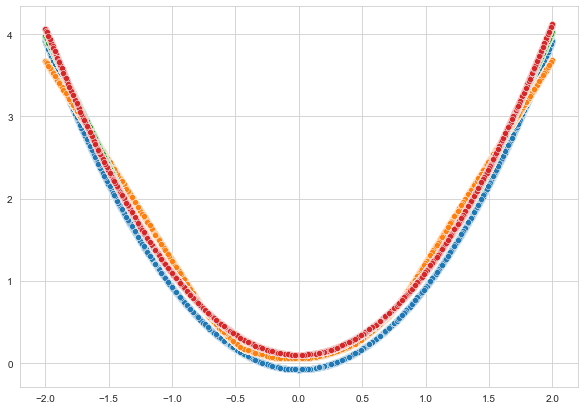

MSE для SGDMomentum: 0.04923680733033292
MSE для Adagard: 0.032261386036443386
MSE для Adam: 0.03348004499496472


In [119]:
x = torch.as_tensor(np.random.uniform(-2, 2, 20000))
y = x**2 + torch.randn(1)*0.1

pred = [float(model.forward(torch.tensor([[i]]).float())) for i in x]
pred2 = [float(model2.forward(torch.tensor([[i]]).float())) for i in x]
pred3 = [float(model3.forward(torch.tensor([[i]]).float())) for i in x]

plt.figure(figsize=[10, 7])
sns.scatterplot(x=x, y=y)
sns.scatterplot(x=x, y=pred)
sns.scatterplot(x=x, y=pred2)
sns.scatterplot(x=x, y=pred3)
plt.show()
print(f'MSE для SGDMomentum: {mean_squared_error(y, pred)}',
      f'MSE для Adagard: {mean_squared_error(y, pred2)}',
      f'MSE для Adam: {mean_squared_error(y, pred3)}', sep='\n')

# Результаты по данным за пределом выученного диапазона

In [120]:
x = torch.as_tensor(np.random.uniform(-5, 5, 20000))
y = x ** 2 + torch.randn(1) * 0.1
pred = [float(model.forward(torch.tensor([[i]]).float())) for i in x]

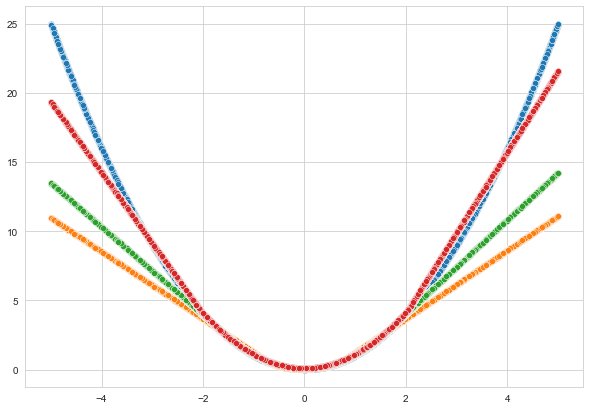

MSE для SGDMomentum: 28.733496264969173
MSE для Adagard: 16.488778451385638
MSE для Adam: 1.942007871776506


In [121]:
pred = [float(model.forward(torch.tensor([[i]]).float())) for i in x]
pred2 = [float(model2.forward(torch.tensor([[i]]).float())) for i in x]
pred3 = [float(model3.forward(torch.tensor([[i]]).float())) for i in x]

plt.figure(figsize=[10, 7])
sns.scatterplot(x=x, y=y)
sns.scatterplot(x=x, y=pred)
sns.scatterplot(x=x, y=pred2)
sns.scatterplot(x=x, y=pred3)
plt.show()
print(f'MSE для SGDMomentum: {mean_squared_error(y, pred)}',
      f'MSE для Adagard: {mean_squared_error(y, pred2)}',
      f'MSE для Adam: {mean_squared_error(y, pred3)}', sep='\n')